In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix

%matplotlib inline

# Memahami Data

Memahami data ini bertujuan untuk mendapatkan insight-insight terhadap data.

In [2]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

## Melihat Sekilas Struktur Data Dataset

Pada bagian ini dapat dilihat bahwa dataset terdiri dari 9 atribut, meliputi:
* holiday
* temp
* rain_1h
* snow_1h
* weatehr_main
* weather_description
* date_time
* traffic_volume

In [237]:
df.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


## Melihat tipe data value yang ada pada setiap atribut

dengan menggunakan metode .info(), kita dapat menyimpulkan beberapa hal:
1. Terdapat tipe data objek, hal ini umumnya menunjukan bahwa berupa kategorikal, perlu dianalisis lebih lanjut
2. Semua attribut memiliki 48204 instansi, hal ini menandakan tidak terdapatnya missing value

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Memperhatikan Nilai Statistik Dataset

Hal ini dilakukan untuk memeriksa nilai value pada dataset (apakah ada outlier/anomali) jika sudah memahami atribut yang ada pada dataset.
Sejauh ini dapat diambil kesimpulan bahwa ukuran yang digunakan pada suhu (temp) adalah kelvin.

In [239]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


# Data Cleaning

## Ditemukan Data Tidak Normal

Sesuai dugaan tadi, terdapat nilai value temp 0 Kelvin, hal ini dapat mengganggu prediksi, maka dari itu data ini dapat dihapuskan nanti. Data ini dapat dihapus karena hilangnya data tersebut tidak mempengaruhi dataset secara keseluruhan.

In [240]:
df[df["temp"] < 243]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11898,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361
11899,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734
11900,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557
11901,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150
11946,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291
11947,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284
11948,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434
11949,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739
11950,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962
11951,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670


In [3]:
## drop temperature yang hanya bernilai 0 kelvin
df.drop(df[df["temp"] < 243].index, inplace=True)
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48194.000000,48194.000000,48194.000000,48194.000000,48194.000000
mean,281.264219,0.334333,0.000222,49.372474,3260.221231
std,12.709587,44.793779,0.008168,39.013317,1986.760420
min,243.390000,0.000000,0.000000,0.000000,0.000000
25%,272.182500,0.000000,0.000000,1.000000,1194.000000
50%,282.460000,0.000000,0.000000,64.000000,3380.500000
75%,291.810000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


## Memeriksa Tipe Data Selain Numerik

Pada Cell sebelumnya terdapat data yang bertipekan objek yaitu, holiday, weather_main, dan weather_description
* Pada fitur holiday, kategori didominasi pada None/Bukan hari libur
* Pada fitur weather_main, merupakan kategori cuaca dengan deskripsi singkat
* Pada fitur weater_description, memiliki banyak kategori dengan deskripsi lebih lanjut daripada weather_main

In [4]:
# df["holiday"].value_counts()
df["weather_main"].value_counts()
# df["weather_description"].value_counts()

Clouds          15164
Clear           13381
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

# Datetime dan Feature Engineering

Karena terdapat atribut datetime, kita perlu memproses lebih lanjut data tersebut untuk mendapatkan insight terbaru.
Kita dapat mengambil data jam, Hari/Tanggal_hari, bulan, tahun.

In [5]:
df["date_time"] = pd.to_datetime(df["date_time"],
                                 format='%Y-%m-%d %H:%M:%S',
                                 errors='coerce')

Data sudah menjadi tipe datetime

In [6]:
df["date_time"].tail(5)

48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, dtype: datetime64[ns]

Jika diperiksa secara seksama, nilai Menit dan Detik selalu 0 jadi bisa kita abaikan

In [7]:
## Hal ini akan berakibat bertambahnya attribut
df["date_time_year"] = df["date_time"].dt.year
df["date_time_month"] = df["date_time"].dt.month
df["date_time_day"] = df["date_time"].dt.day
df["date_time_hour"] = df["date_time"].dt.hour

Jika diperiksa lebih lanjut, setiap tahun, bulan, hari, dan jam lengkap

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48194 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48194 non-null  object        
 1   temp                 48194 non-null  float64       
 2   rain_1h              48194 non-null  float64       
 3   snow_1h              48194 non-null  float64       
 4   clouds_all           48194 non-null  int64         
 5   weather_main         48194 non-null  object        
 6   weather_description  48194 non-null  object        
 7   date_time            48194 non-null  datetime64[ns]
 8   traffic_volume       48194 non-null  int64         
 9   date_time_year       48194 non-null  int64         
 10  date_time_month      48194 non-null  int64         
 11  date_time_day        48194 non-null  int64         
 12  date_time_hour       48194 non-null  int64         
dtypes: datetime64[ns](1), float64(3

In [247]:
df.groupby("date_time_year").size()
# df.groupby("date_time_month").size()
# df.groupby("date_time_day").size()
# df.groupby("date_time_hour").size()

date_time_year
2012     2559
2013     8573
2014     4829
2015     4373
2016     9306
2017    10605
2018     7949
dtype: int64

# Univariate Analysis

## Melihat Lebih Jauh Menggunakan Histogram pada Fitur Numerik

Melihat lebih jelas memanfaatkan histogram, histogram menunjukan banyak instansi terhadap rentang nilai pada atribut tersebut.
Sejauh ini insight yang didapat adalah:
1. Skala yang digunakan berbeda beda
2. Pada rain_1h dan snow_1h hanya memilki satu rentang saja

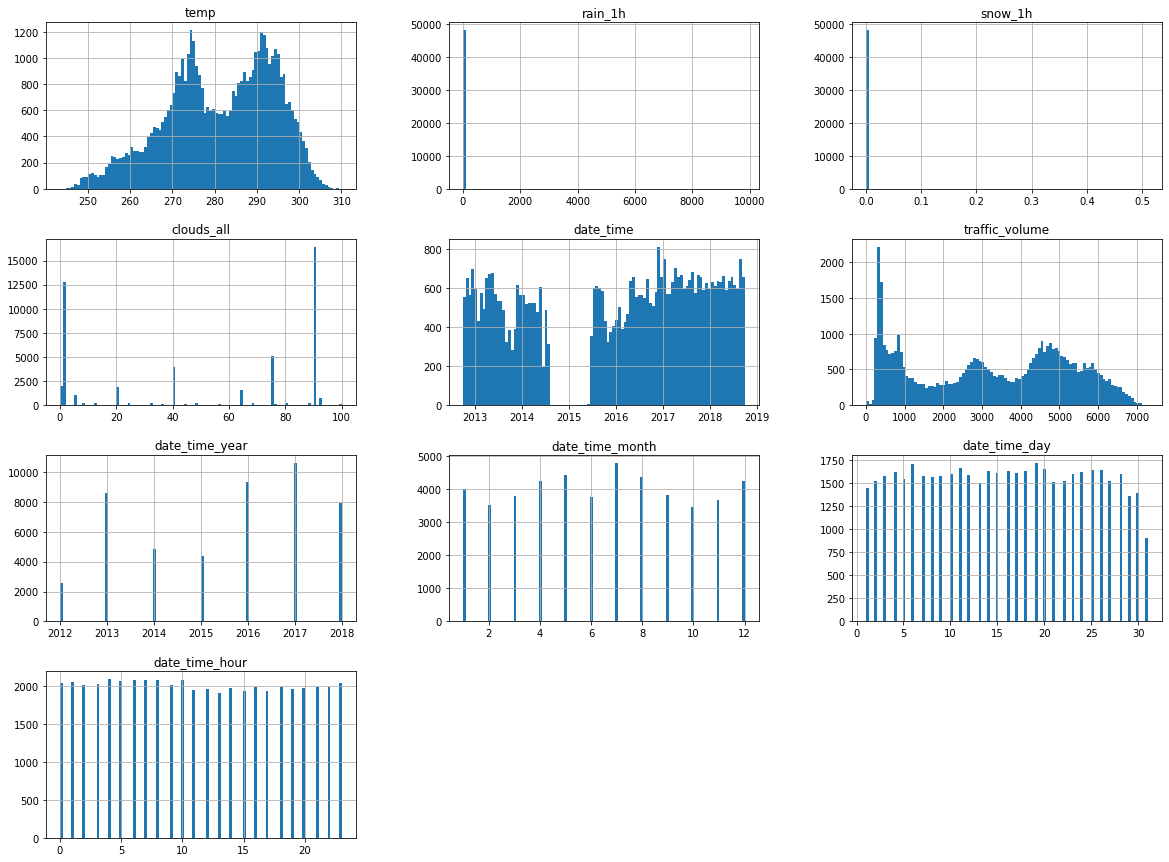

In [248]:
df.hist(bins=100, figsize=(20, 15))
plt.show()

## Menganalisis Fitur Kategorikal Menggunakan Bar Chart

1. Melihat ketersebaran data pada setiap kategori

<AxesSubplot:title={'center':'Weather Main'}>

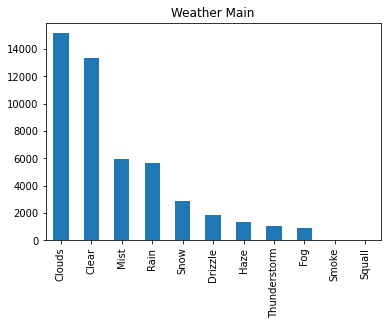

In [249]:
df["weather_main"].value_counts().plot(kind="bar", title="Weather Main")

<AxesSubplot:title={'center':'Weather Description'}>

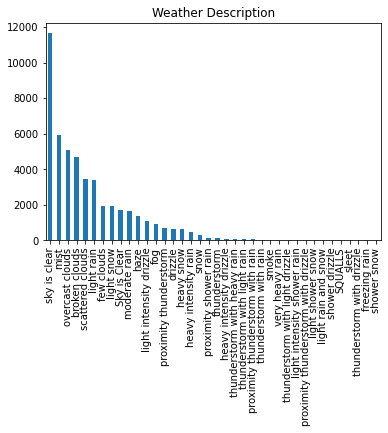

In [250]:
# df["weather_description"].value_counts()
df["weather_description"].value_counts().plot(kind="bar", title="Weather Description")

<AxesSubplot:title={'center':'Holiday'}>

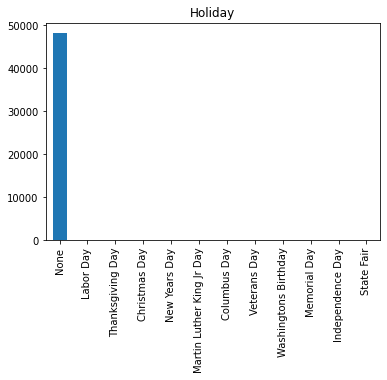

In [251]:
df["holiday"].value_counts().plot(kind="bar", title="Holiday")

# Multivariate Analysis

## Mencari Korelasi Pada Fitur Numerik

Machine learning akan bekerja lebih baik pada fitur-fitur yang memiliki korelasi linear yang kuat
Dapat dilihat bahwa nilai korelasi yang ada pada dataset terhadap atribut label.

Nilai korelasi linear ini jatuh pada rentang -1 dan 1. Dimana semakin mendekati 1 berarti memiliki korelasi linear positif yang kuat dan mendekati -1 memiliki korelasi linear negatif yang kuat

In [252]:
corr_matrix = df.corr()
corr_matrix["traffic_volume"].sort_values(ascending=False)

traffic_volume     1.000000
date_time_hour     0.352289
temp               0.132291
clouds_all         0.066819
rain_1h            0.004713
date_time_year     0.004592
snow_1h            0.000728
date_time_month   -0.002816
date_time_day     -0.007763
Name: traffic_volume, dtype: float64

array([[<AxesSubplot:xlabel='temp', ylabel='temp'>,
        <AxesSubplot:xlabel='date_time_hour', ylabel='temp'>,
        <AxesSubplot:xlabel='clouds_all', ylabel='temp'>,
        <AxesSubplot:xlabel='traffic_volume', ylabel='temp'>],
       [<AxesSubplot:xlabel='temp', ylabel='date_time_hour'>,
        <AxesSubplot:xlabel='date_time_hour', ylabel='date_time_hour'>,
        <AxesSubplot:xlabel='clouds_all', ylabel='date_time_hour'>,
        <AxesSubplot:xlabel='traffic_volume', ylabel='date_time_hour'>],
       [<AxesSubplot:xlabel='temp', ylabel='clouds_all'>,
        <AxesSubplot:xlabel='date_time_hour', ylabel='clouds_all'>,
        <AxesSubplot:xlabel='clouds_all', ylabel='clouds_all'>,
        <AxesSubplot:xlabel='traffic_volume', ylabel='clouds_all'>],
       [<AxesSubplot:xlabel='temp', ylabel='traffic_volume'>,
        <AxesSubplot:xlabel='date_time_hour', ylabel='traffic_volume'>,
        <AxesSubplot:xlabel='clouds_all', ylabel='traffic_volume'>,
        <AxesSubplot:xlabel='

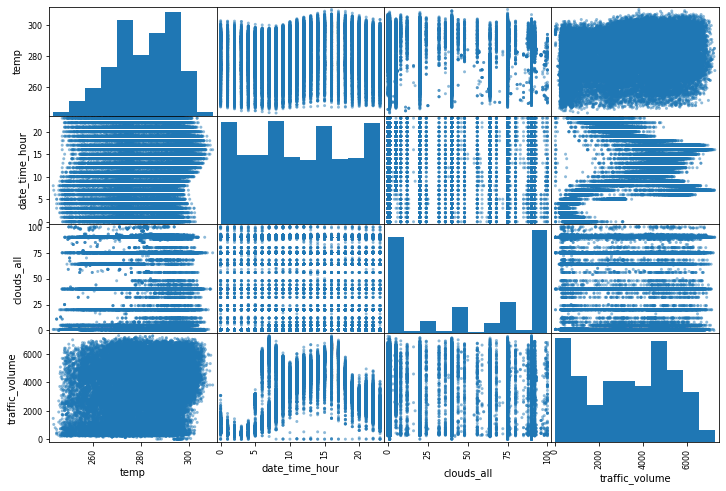

In [253]:
numerical_attributes = ["temp", "date_time_hour", "clouds_all", 
                        "traffic_volume"]

scatter_matrix(df[numerical_attributes], figsize=(12, 8))

# Melihat Lebih Jauh

Jika dilihat hubungan antara fitur date_time_hour dengan fitur target traffic_volume memiliki hubungan non-linear

<AxesSubplot:xlabel='date_time_hour', ylabel='traffic_volume'>

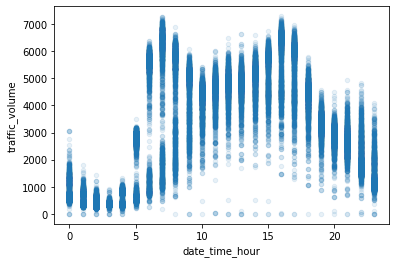

In [254]:
df.plot(kind="scatter", x="date_time_hour", y="traffic_volume", alpha=0.1)

## Analisis Fitur Kategorikal

Memperhatikan representasi yang ada, dapat disimpulkan bahwa:
1. Volume Traffic cenderung menurun saat tidak ada hari libur
2. Volume Traffic juga cenderung menurun ketika terjadi badai

In [255]:
categorical_features = ["holiday", "weather_main", "weather_description"]

Text(0.5, 1.0, 'Rata-rata Volume Traffic terhadap - holiday')

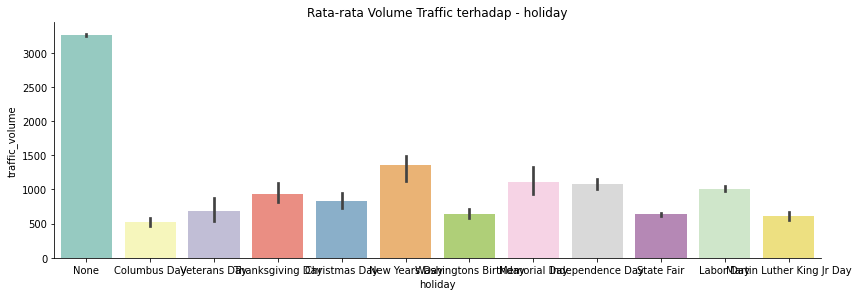

In [256]:
col = categorical_features[0]

sns.catplot(x=col, y="traffic_volume", kind="bar",
            dodge=False, height=4, aspect=3,
            data=df, palette="Set3", legend=True)
plt.title("Rata-rata Volume Traffic terhadap - {}".format(col))

Text(0.5, 1.0, 'Rata-rata Volume Traffic terhadap - weather_main')

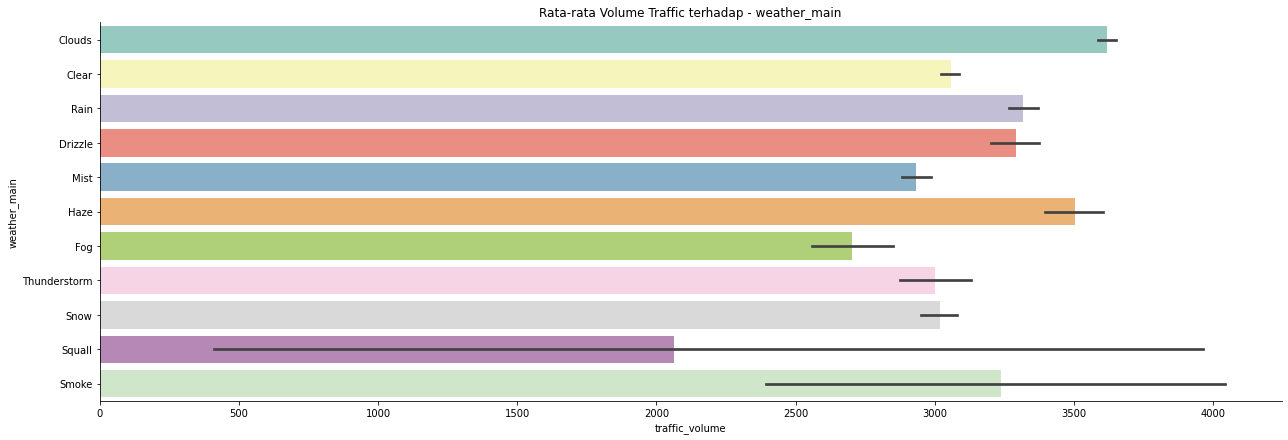

In [257]:
col = categorical_features[1]

sns.catplot(x="traffic_volume", y=col, kind="bar",
            dodge=False, height=6, aspect=3,
            data=df, palette="Set3", legend=True)
plt.title("Rata-rata Volume Traffic terhadap - {}".format(col))

Text(0.5, 1.0, 'Rata-rata Volume Traffic terhadap - weather_description')

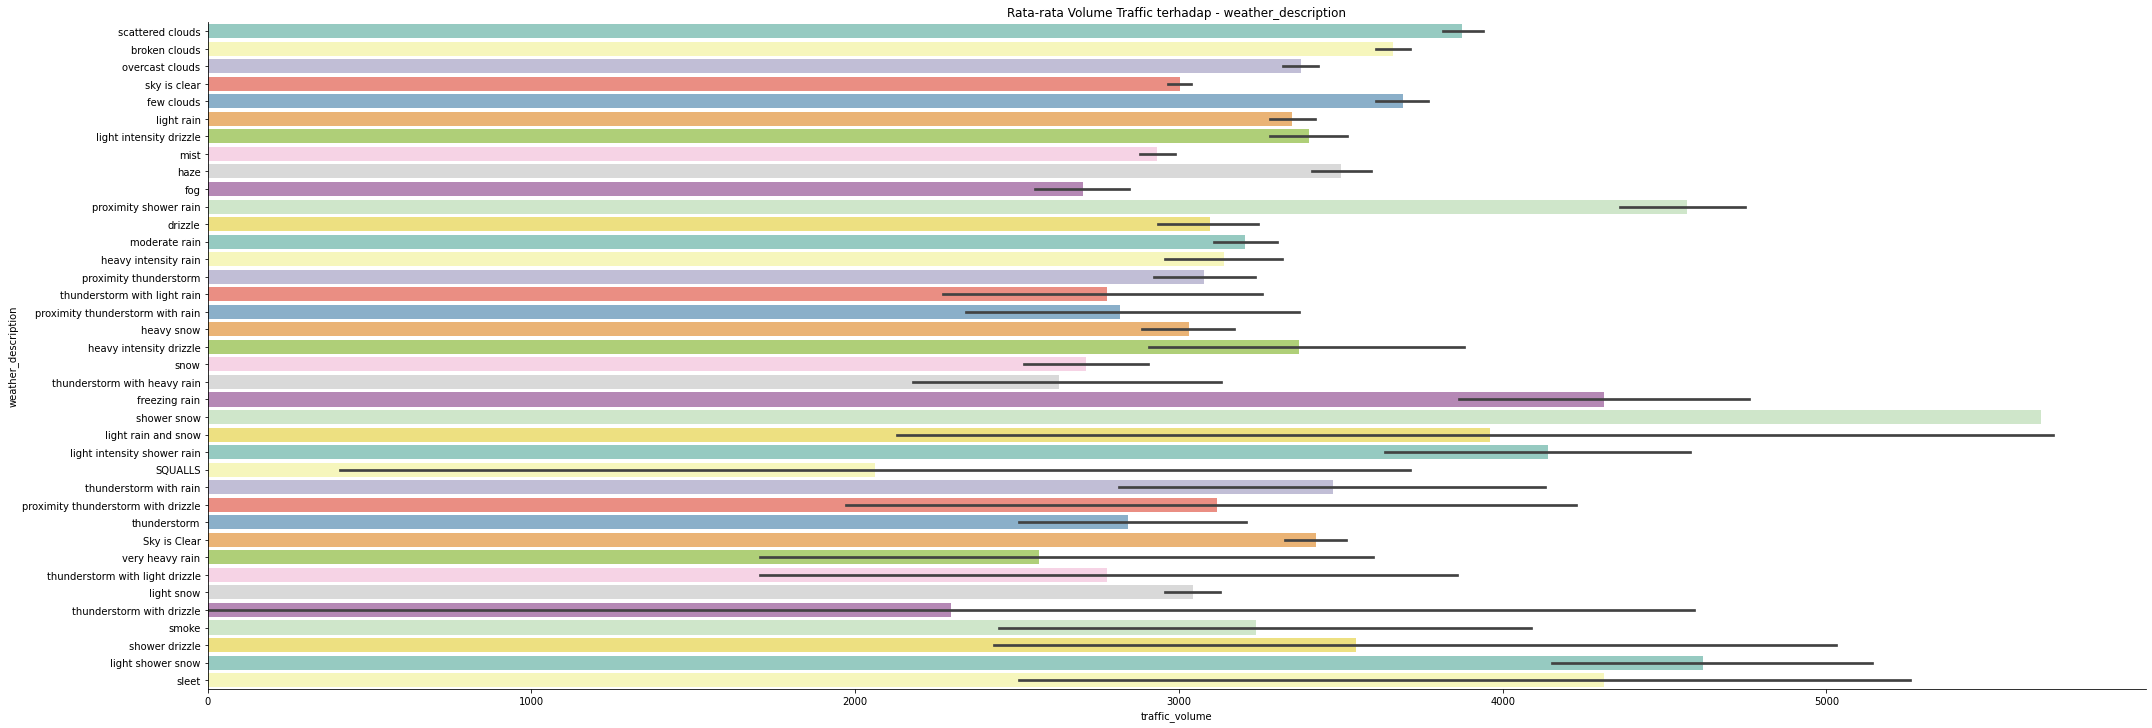

In [258]:
col = categorical_features[2]

sns.catplot(x="traffic_volume", y=col, kind="bar",
            dodge=False, height=10, aspect=3,
            data=df, palette="Set3", legend=True)
plt.title("Rata-rata Volume Traffic terhadap - {}".format(col))

## Kesimpulan Visualisasi Data

Setelah melihat dan memahami data, untuk sementara dapat disimpulkan bahwa terdapat beberapa fitur yang perlu disimpan dan sisanya di-drop. Untuk fitur numerik yang memiliki nilai koefisien korelasi sangat mendekati 0 akan didrop. Setelah ini akan dilanjutkan pada Data Preparation

# Data Preparation

* Split the data
* Merubah tipe data kategori menjadi numerik
* Menstardarisasi tipe data numerik

## Split the Data

Membagi data dari training dan testing dengan rasio 90:10

In [259]:
df["weather_main"].value_counts()

Clouds          15164
Clear           13381
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [8]:
columns = ["weather_main"]
df_reset_index = df.reset_index()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)
for train_index, test_index in split.split(df_reset_index, df_reset_index[columns]):
    strat_train_set = df_reset_index.loc[train_index]
    strat_test_set = df_reset_index.loc[test_index]

In [9]:
feature_columns = ["temp", "date_time_hour", "weather_main"]
label_columns = ["traffic_volume"]

X_train = strat_train_set[feature_columns]
y_train = strat_train_set[label_columns]

X_test = strat_test_set[feature_columns]
y_test = strat_test_set[label_columns]

In [10]:
print(X_train.shape)
print(X_test.shape)

(40964, 3)
(7230, 3)


## Handling Categorical Data

Pada bagian ini akan dilakukan perubahan data kategorikal menjadi data numerik menggunakan metode OneHotEncoding.

In [276]:
cat_encoder = OneHotEncoder()

weather_desc_cat = X_train[["weather_main"]]
wd_cat_1hot = cat_encoder.fit_transform(weather_desc_cat)

wd_cat_1hot.shape

(40964, 11)

## Normalisasi/Standarisasi Data

Karena data memiliki skala yang berbeda, alangkah lebih baik untuk dinormalisasikan/distandarisasikan

In [12]:
num_columns = ["temp", "date_time_hour"]

numerical_pipeline = Pipeline([
    ("minmax_scaler", MinMaxScaler())
])

df_num = numerical_pipeline.fit_transform(X_train[num_columns])
df_num.shape

(40964, 2)

## Transformation Pipeline

Pada bagian ini adalah pengaplikasian dari feature scaling dan perubahan kategorikal data memanfaatkan pipeline yang disediakan oleh library Sckit Learn.

In [13]:
num_columns = ["temp", "date_time_hour"]
cat_columns = columns

transform_pipeline = ColumnTransformer([
    ("numeric", numerical_pipeline, num_columns),
    ("categorical", OneHotEncoder(), cat_columns)
])

X_train_prepared = transform_pipeline.fit_transform(X_train)
y_train = np.reshape(y_train.to_numpy(), y_train.shape[0])
X_test_prepared = transform_pipeline.fit_transform(X_test)
y_test = np.reshape(y_test.to_numpy(), y_test.shape[0])

In [14]:
print("The train data sparse matrix is in shape of {}".format(X_train_prepared.shape))
print("The test data sparse matrix is in shape of {}".format(X_test_prepared.shape))

The train data sparse matrix is in shape of (40964, 13)
The test data sparse matrix is in shape of (7230, 13)


# Modelling

Model yang digunakan antar lain sebagai berikut:
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor

In [22]:
df_models = pd.DataFrame(index=["LinearRegression", "DTRegressor", "RFRegressor"],
                         columns=["train_rmse", "test_rmse"])

In [20]:
def evaluation(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train,
                             scoring="neg_root_mean_squared_error",
                             cv=8)
    train_rmse = -scores.mean()
    
    tv_prediction = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, tv_prediction))
    return train_rmse, test_rmse

In [282]:
## fitting the data Linear Regression
lin_reg = LinearRegression()

train_rmse, test_rmse = evaluation(lin_reg, X_train_prepared, y_train, X_test_prepared, y_test)

df_models.loc["LinearRegression", "test_rmse"] = test_rmse
df_models.loc["LinearRegression", "train_rmse"] = train_rmse

df_models

,train_rmse,test_rmse
LinearRegression,1839.376566,1843.351756
DTRegressor,NaN,NaN
RFRegressor,NaN,NaN


In [283]:
# fitting the data using DTRegressor
tree_reg = DecisionTreeRegressor()

train_rmse, test_rmse = evaluation(tree_reg, X_train_prepared, y_train, X_test_prepared, y_test)

print(train_rmse)
print(test_rmse)
df_models.loc["DTRegressor", "test_rmse"] = test_rmse
df_models.loc["DTRegressor", "train_rmse"] = train_rmse

df_models

1239.3915964667044
1256.8005487492617


,train_rmse,test_rmse
LinearRegression,1839.376566,1843.351756
DTRegressor,1239.391596,1256.800549
RFRegressor,NaN,NaN


In [284]:
## fitting the data using RFRegressor
forest_reg = RandomForestRegressor()

train_rmse, test_rmse = evaluation(forest_reg, X_train_prepared, y_train, X_test_prepared, y_test)

df_models.loc["RFRegressor", "test_rmse"] = test_rmse
df_models.loc["RFRegressor", "train_rmse"] = train_rmse

df_models

,train_rmse,test_rmse
LinearRegression,1839.376566,1843.351756
DTRegressor,1239.391596,1256.800549
RFRegressor,1013.407982,1026.672234


# Visualisasi Hasil Training Model

Berikut adalah visualisasi perbandingan metrik evaluasi setiap model.

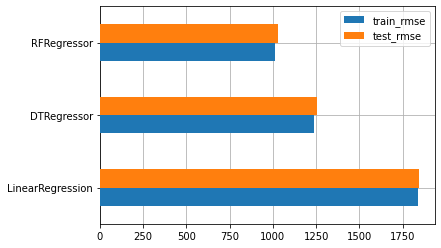

In [285]:
fig, ax = plt.subplots()
df_models.sort_values(by='test_rmse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

# Mencari Parameter Terbaik Dengan GridSearch

Parameter terbaik yang ditemukan dengan menggunakan cross validation adalah sebagai berikut

In [16]:
param_grid = [
    {'n_estimators': [3, 10, 30, 50, 70, 100], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50], 'max_features': [2, 3, 4]},
]

forest_reg_gs = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg_gs, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True,
                           verbose=2,)

grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................max_features=2, n_estimators=3; total time=   1.5s
[CV] END .....................max_features=2, n_estimators=3; total time=   1.5s
[CV] END .....................max_features=2, n_estimators=3; total time=   1.5s
[CV] END .....................max_features=2, n_estimators=3; total time=   1.6s
[CV] END .....................max_features=2, n_estimators=3; total time=   1.5s
[CV] END ....................max_features=2, n_estimators=10; total time=   5.3s
[CV] END ....................max_features=2, n_estimators=10; total time=   5.3s
[CV] END ....................max_features=2, n_estimators=10; total time=   5.2s
[CV] END ....................max_features=2, n_estimators=10; total time=   5.2s
[CV] END ....................max_features=2, n_estimators=10; total time=   5.4s
[CV] END ....................max_features=2, n_estimators=30; total time=  15.9s
[CV] END ....................max_features=2, n_

[CV] END ...bootstrap=False, max_features=2, n_estimators=30; total time=  24.6s
[CV] END ...bootstrap=False, max_features=2, n_estimators=30; total time=  25.3s
[CV] END ...bootstrap=False, max_features=2, n_estimators=30; total time=  24.8s
[CV] END ...bootstrap=False, max_features=2, n_estimators=30; total time=  25.2s
[CV] END ...bootstrap=False, max_features=2, n_estimators=50; total time=  42.2s
[CV] END ...bootstrap=False, max_features=2, n_estimators=50; total time=  41.8s
[CV] END ...bootstrap=False, max_features=2, n_estimators=50; total time=  41.7s
[CV] END ...bootstrap=False, max_features=2, n_estimators=50; total time=  41.5s
[CV] END ...bootstrap=False, max_features=2, n_estimators=50; total time=  40.8s
[CV] END ....bootstrap=False, max_features=3, n_estimators=3; total time=   2.4s
[CV] END ....bootstrap=False, max_features=3, n_estimators=3; total time=   2.5s
[CV] END ....bootstrap=False, max_features=3, n_estimators=3; total time=   2.6s
[CV] END ....bootstrap=False

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [3, 10, 30, 50, 70, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30, 50]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [17]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 100}

In [18]:
cv_res = grid_search.cv_results_
for rmse, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print((-rmse), params)

1175.345358114862 {'max_features': 2, 'n_estimators': 3}
1117.8847065518125 {'max_features': 2, 'n_estimators': 10}
1097.8868262036347 {'max_features': 2, 'n_estimators': 30}
1097.7973874721906 {'max_features': 2, 'n_estimators': 50}
1096.1573377567943 {'max_features': 2, 'n_estimators': 70}
1094.6589948561277 {'max_features': 2, 'n_estimators': 100}
1164.3993928982777 {'max_features': 4, 'n_estimators': 3}
1120.2054886182466 {'max_features': 4, 'n_estimators': 10}
1100.6225485708133 {'max_features': 4, 'n_estimators': 30}
1098.736501525485 {'max_features': 4, 'n_estimators': 50}
1096.2647195043933 {'max_features': 4, 'n_estimators': 70}
1094.025770261595 {'max_features': 4, 'n_estimators': 100}
1159.713552160286 {'max_features': 6, 'n_estimators': 3}
1106.2432271466148 {'max_features': 6, 'n_estimators': 10}
1093.5808378928418 {'max_features': 6, 'n_estimators': 30}
1088.7825552066997 {'max_features': 6, 'n_estimators': 50}
1089.8342855587803 {'max_features': 6, 'n_estimators': 70}
10

In [27]:
# fitting the data using RFRegressor
forest_reg_ht = RandomForestRegressor(max_features=6, n_estimators=100)

train_rmse, test_rmse = evaluation(forest_reg_ht, X_train_prepared, y_train, X_test_prepared, y_test)
print(train_rmse, test_rmse)

df_models.loc["RFRegressorHT", "test_rmse"] = test_rmse
df_models.loc["RFRegressorHT", "train_rmse"] = train_rmse

df_models

,train_rmse,test_rmse
LinearRegression,1839.376566,1843.351756
DTRegressor,1239.391596,1256.800549
RFRegressor,1013.407982,1026.672234
RFRegressorHT,1087.930119,1050.877457


# Visualisasi Perbandingan Model Dengan Hyperparameter Tuning

Berikut menambahkan model Random Forest Regressor memanfaatkan hyperparameter tuning menggunakan metode grid search

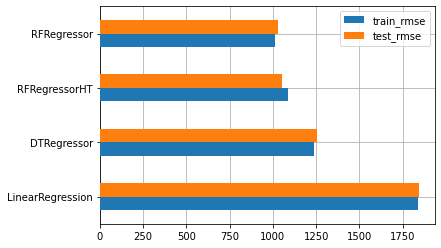

In [28]:
fig, ax = plt.subplots()
df_models.sort_values(by='test_rmse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)